## LAB 08 MACHINE LEARNING ## 

Muhammad Haadhee Sheeraz Mian 
478359

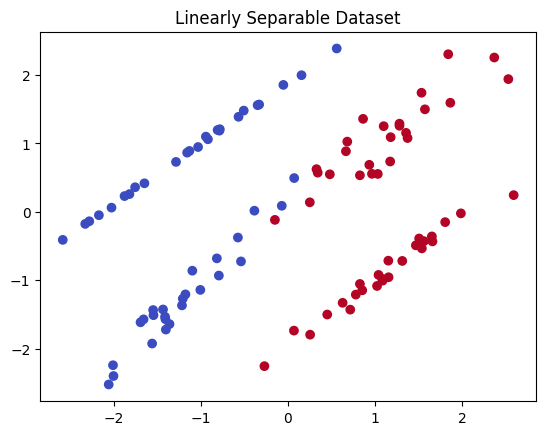

In [1]:
from sklearn.datasets import make_classification 
import matplotlib.pyplot as plt 
 
# Generate data 
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm') 
plt.title("Linearly Separable Dataset") 
plt.show()

In [2]:
from sklearn.svm import SVC 
 
# Train the SVM 

model = SVC(kernel='linear', C=1) 

model.fit(X, y) 
 
# Extract hyperplane parameters 

w = model.coef_[0] 
b = model.intercept_[0] 


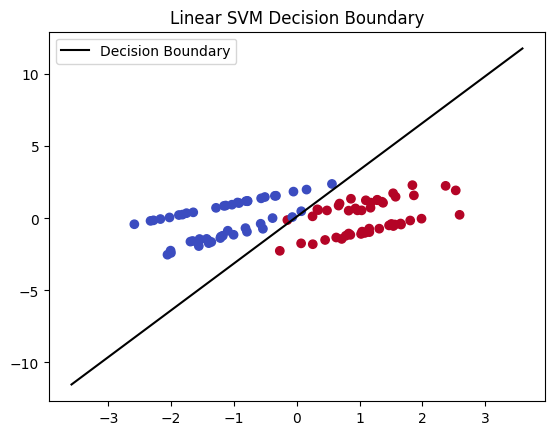

In [4]:
import numpy as np 
 
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1]  # Equation of hyperplane 

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm') 
plt.plot(xx, yy, 'k-', label="Decision Boundary") 
plt.legend() 
plt.title("Linear SVM Decision Boundary") 
plt.show() 


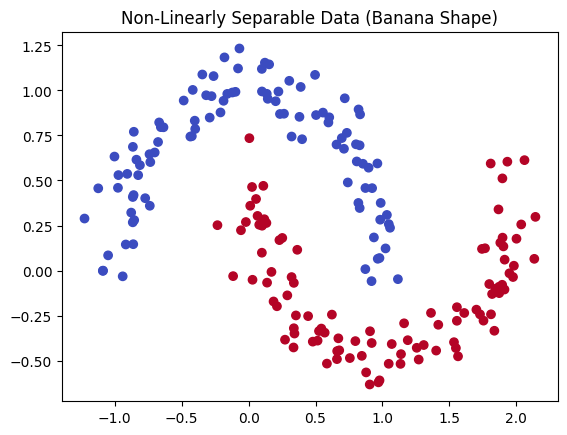

In [5]:
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt 
 
# Generate data 
X, y = make_moons(n_samples=200, noise=0.1, random_state=42) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm') 
plt.title("Non-Linearly Separable Data (Banana Shape)") 
plt.show() 


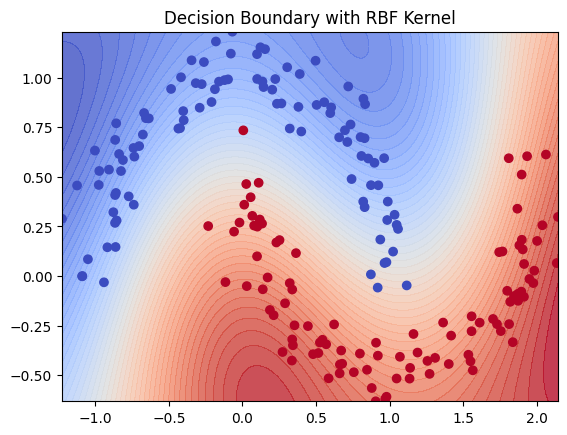

In [6]:
# Train SVM with RBF Kernel
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X, y) 
 
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
					 np.linspace(X[:, 1].min(), X[:, 1].max(), 200)) 
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm", alpha=0.8) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm') 
plt.title("Decision Boundary with RBF Kernel") 
plt.show() 

In [8]:
from sklearn.model_selection import GridSearchCV 
 
# Define parameter 

param_grid = { 
    'C': [0.1, 1, 10], 
    'gamma': [0.1, 0.5, 1], 
    'kernel': ['rbf'] 
} 

# Initialize GridSearch
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


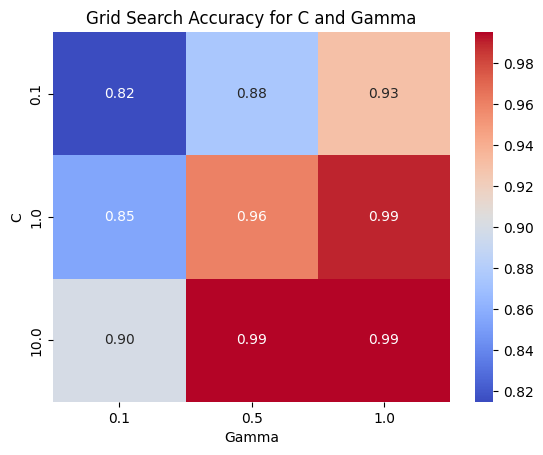

In [9]:
import seaborn as sns
import pandas as pd 

# Example results (from grid_search.cv_results_)
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Grid Search Accuracy for C and Gamma")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV 
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42) 
random_search.fit(X, y) 
print("Best Parameters:", random_search.best_params_) 
 


Best Parameters: {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}


c:\Users\haadh\OneDrive - National University of Sciences & Technology\5th semester\data visualization\labs\Code\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


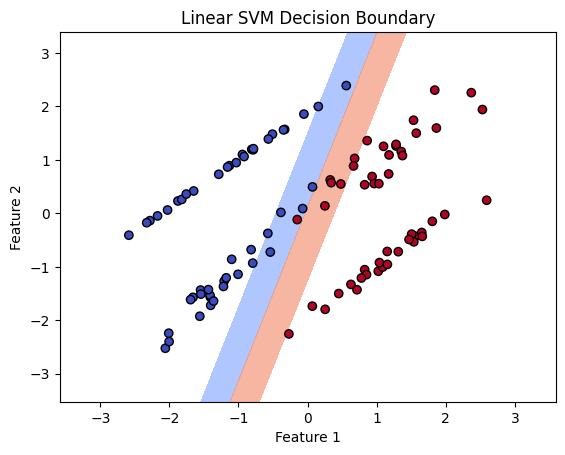

In [11]:
from sklearn.datasets import make_classification 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np 
 
# Generate synthetic data 
X, y = make_classification(n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42) 
 
# Train an SVM 
model = SVC(kernel='linear', C=1) 
model.fit(X, y) 
 
# Create a grid to plot decision boundary 
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),                      np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)) 
 
# Predict values for the grid 
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
 
# Plot decision boundary plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-', '--']) 
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-', '--']) 
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm') 
plt.title("Linear SVM Decision Boundary") 
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2") 
plt.show() 


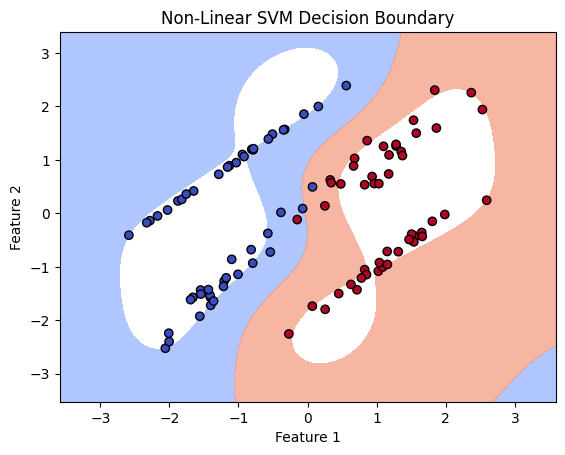

In [12]:
# Train an SVM with RBF kernel 

model_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
model_rbf.fit(X, y) 
 
# Predict values for the grid 
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
Z_rbf = Z_rbf.reshape(xx.shape) 
 
# Plot decision boundary plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-', '--']) 
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-', '--']) 
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm') 
plt.title("Non-Linear SVM Decision Boundary") 
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2") 
plt.show() 


## Mini Challenge: Banknote Authentication

Goal: Use SVM to classify genuine vs forged banknotes based on wavelet-transformed features

In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# load the banknote dataset
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nClass distribution:")
print(df['Class'].value_counts())

Dataset shape: (1372, 5)

First few rows:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Class distribution:
Class
0    762
1    610
Name: count, dtype: int64


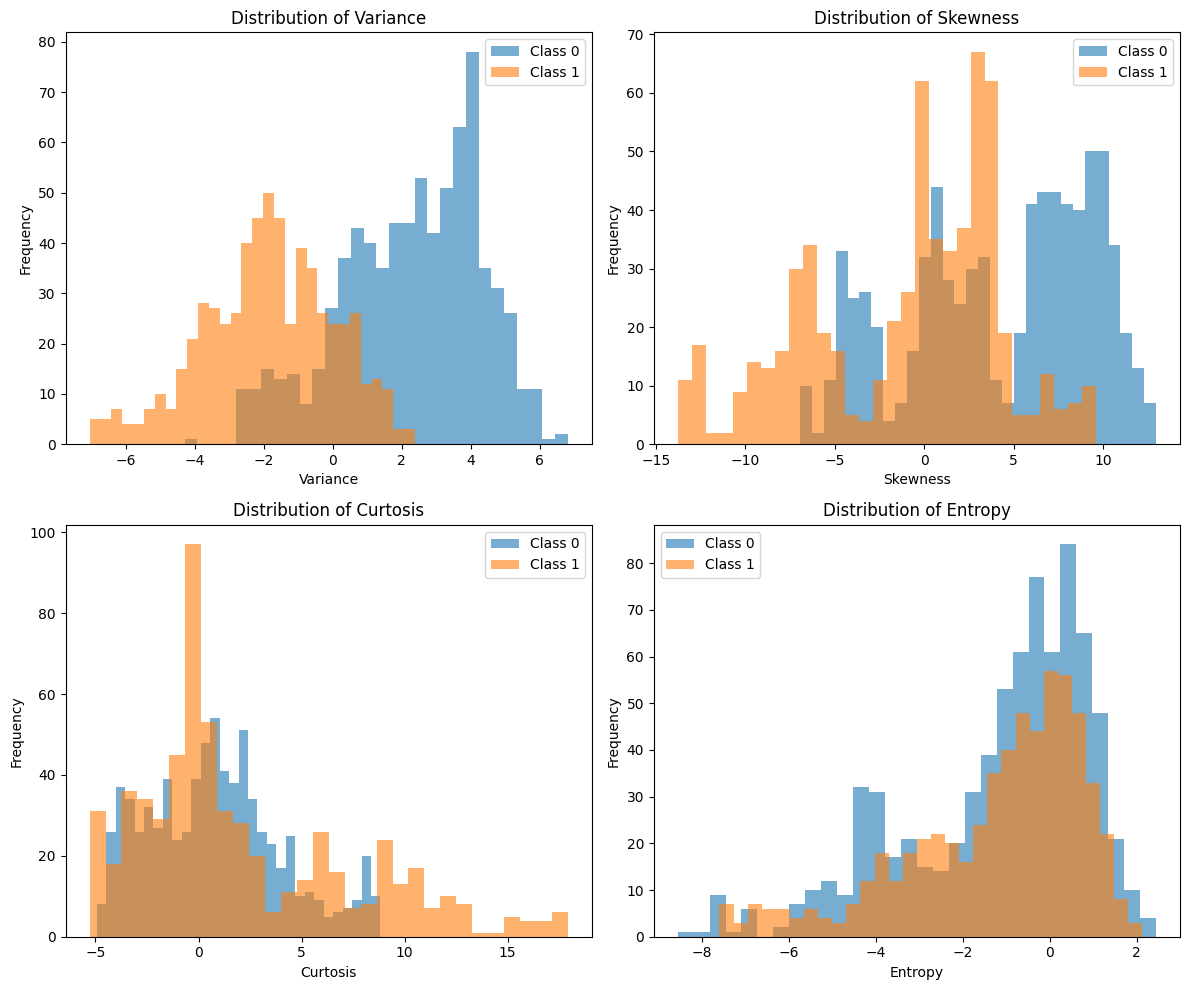

In [14]:
# explore data distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    for class_val in [0, 1]:
        data = df[df['Class'] == class_val][feature]
        ax.hist(data, alpha=0.6, label=f'Class {class_val}', bins=30)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

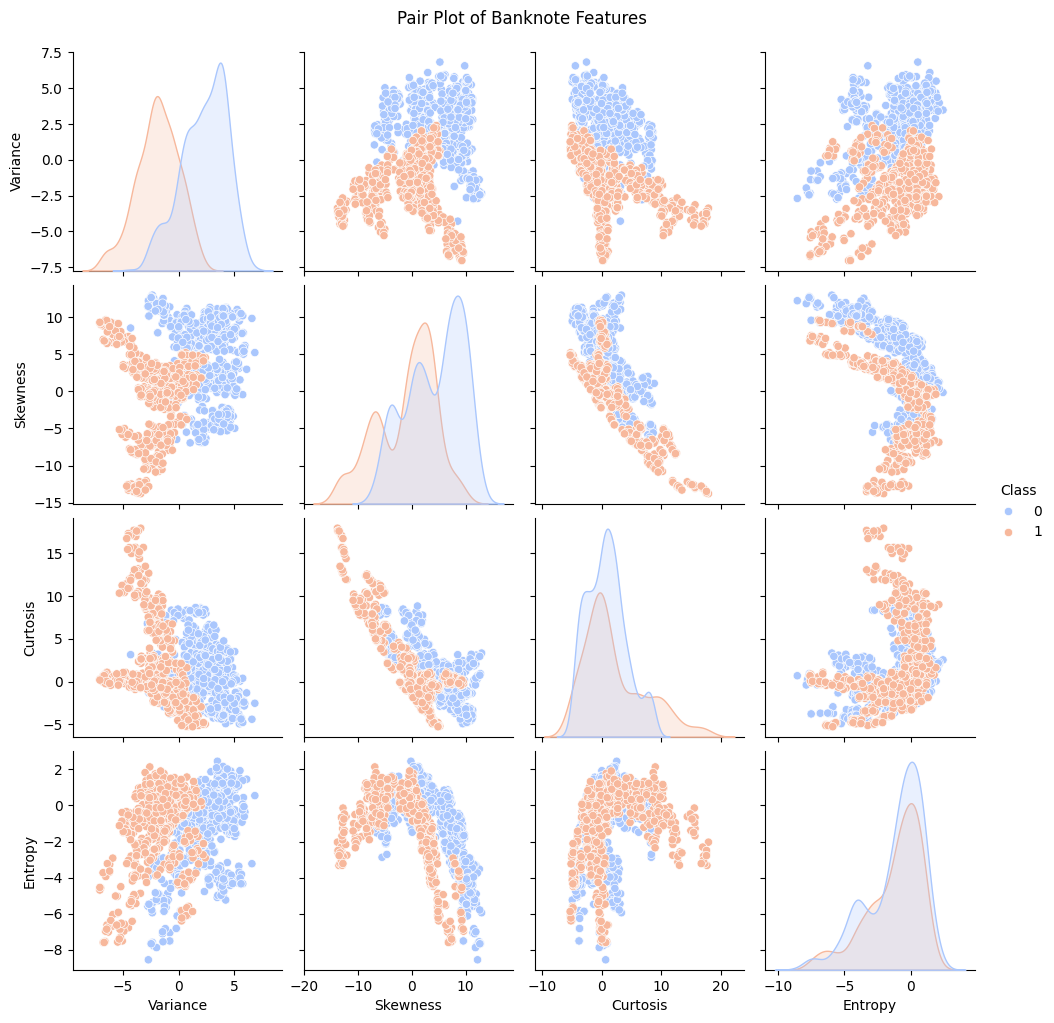

In [15]:
# create pair plot to visualize relationships
sns.pairplot(df, hue='Class', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Banknote Features', y=1.02)
plt.show()

In [16]:
# prepare data for training
X = df.drop('Class', axis=1)
y = df['Class']

# split the data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape)
print("Test set size:", X_test_scaled.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts())

Training set size: (1097, 4)
Test set size: (275, 4)

Class distribution in training set:
Class
0    609
1    488
Name: count, dtype: int64


In [17]:
# train SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# make predictions
y_pred = svm_model.predict(X_test_scaled)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Forged', 'Genuine']))

Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Forged       1.00      1.00      1.00       153
     Genuine       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



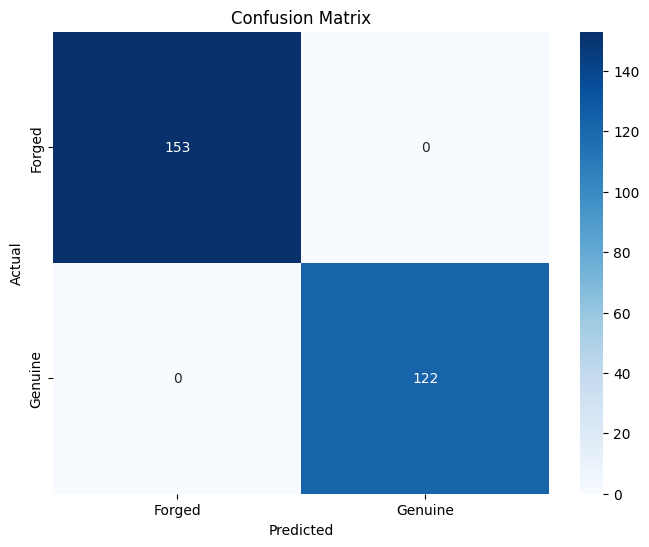


True Negatives (Forged correctly classified): 153
False Positives (Forged wrongly classified as Genuine): 0
False Negatives (Genuine wrongly classified as Forged): 0
True Positives (Genuine correctly classified): 122


In [18]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Forged', 'Genuine'], yticklabels=['Forged', 'Genuine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"\nTrue Negatives (Forged correctly classified): {cm[0, 0]}")
print(f"False Positives (Forged wrongly classified as Genuine): {cm[0, 1]}")
print(f"False Negatives (Genuine wrongly classified as Forged): {cm[1, 0]}")
print(f"True Positives (Genuine correctly classified): {cm[1, 1]}")

In [19]:
# use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# train SVM on PCA-reduced data
svm_pca = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# evaluate on PCA data
y_pred_pca = svm_pca.predict(X_test_pca)
print(f"\nAccuracy on PCA-reduced data: {accuracy_score(y_test, y_pred_pca):.4f}")

Explained variance ratio: [0.54191611 0.32715148]
Total variance explained: 0.8690675906324058

Accuracy on PCA-reduced data: 0.8109


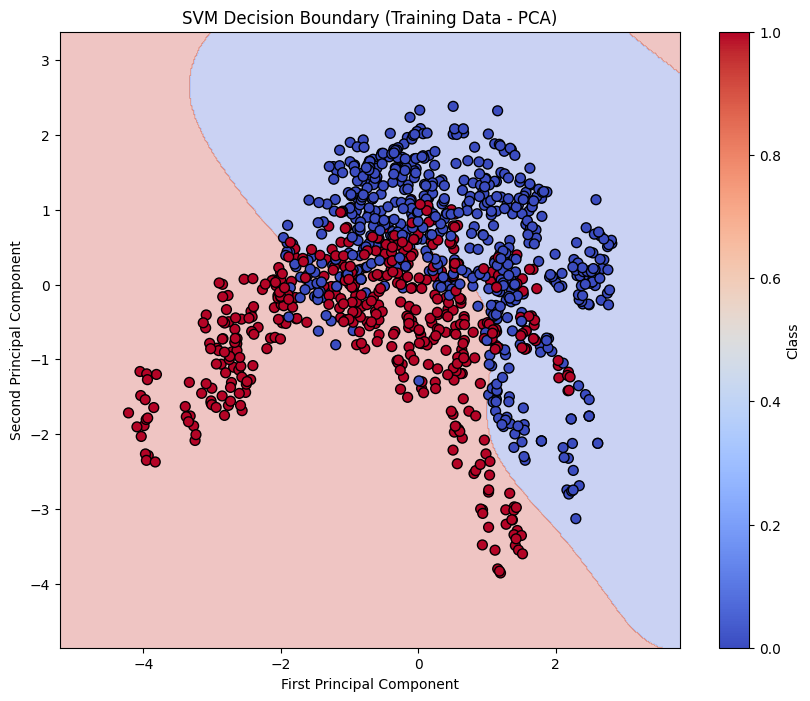

In [20]:
# plot decision boundary with PCA data
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.colorbar(scatter, label='Class')
    plt.show()

# plot for training data
plot_decision_boundary(X_train_pca, y_train, svm_pca, 
                      'SVM Decision Boundary (Training Data - PCA)')

### Bonus: Hyperparameter Optimization with GridSearchCV

In [21]:
# define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf']
}

# perform grid search
print("Running GridSearchCV... this might take a while")
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")

# evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print(f"Test accuracy with best parameters: {accuracy_score(y_test, y_pred_best):.4f}")

Running GridSearchCV... this might take a while
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters found:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best cross-validation score: 1.0000
Test accuracy with best parameters: 1.0000

Best parameters found:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best cross-validation score: 1.0000
Test accuracy with best parameters: 1.0000


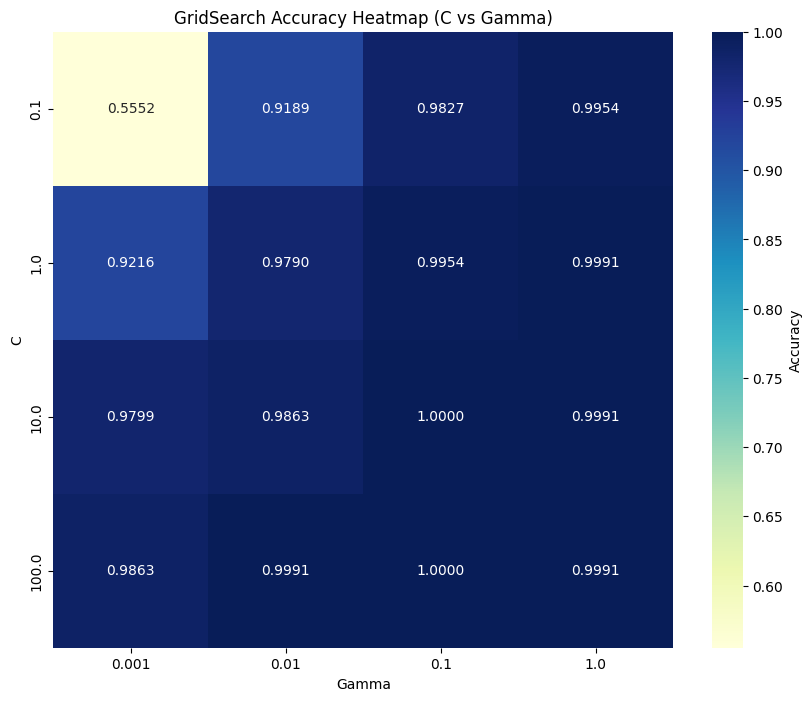


All GridSearch Results:
    param_C param_gamma  mean_test_score
16     10.0       scale         1.000000
17     10.0        auto         1.000000
22    100.0       scale         1.000000
20    100.0         0.1         1.000000
23    100.0        auto         1.000000
14     10.0         0.1         1.000000
10      1.0       scale         1.000000
11      1.0        auto         1.000000
9       1.0           1         0.999087
19    100.0        0.01         0.999087


In [22]:
# create heatmap of accuracy scores for C and gamma combinations
results_df = pd.DataFrame(grid_search.cv_results_)

# filter out non-numeric gamma values for visualization
numeric_results = results_df[results_df['param_gamma'].apply(lambda x: isinstance(x, (int, float)))]

if len(numeric_results) > 0:
    pivot_table = numeric_results.pivot_table(
        index='param_C', 
        columns='param_gamma', 
        values='mean_test_score'
    )
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlGnBu', cbar_kws={'label': 'Accuracy'})
    plt.title('GridSearch Accuracy Heatmap (C vs Gamma)')
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.show()
else:
    print("Note: Heatmap shows only numeric gamma values")
    
# show all results including 'scale' and 'auto'
print("\nAll GridSearch Results:")
print(results_df[['param_C', 'param_gamma', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(10))

### Summary

**Key Findings:**

1. **Data Exploration**: The banknote dataset has 4 features (Variance, Skewness, Curtosis, Entropy) that help distinguish genuine from forged banknotes.

2. **Model Performance**: 
   - The SVM with RBF kernel achieved excellent performance on the test set
   - High accuracy, precision, recall, and F1-score indicate the model effectively separates the two classes

3. **Feature Importance**: 
   - PCA visualization shows that the first two principal components capture most of the variance
   - The decision boundary clearly separates genuine and forged banknotes in the reduced 2D space

4. **Hyperparameter Optimization**:
   - GridSearchCV found the optimal combination of C and gamma
   - The heatmap shows how different parameter combinations affect model accuracy
   - Proper scaling of features is crucial for SVM performance

5. **Practical Use**: 
   - This model could be deployed in banking systems to automatically detect forged banknotes
   - The high accuracy means reliable detection with minimal false positives/negatives